# Project 

In this notebook, we will examine a dataset of video game sales using EDA, exploring various aspects of the video game industry such as the most popular games, platforms, publishers, and genres. Video games have become a staple of modern entertainment, with an industry worth billions of dollars worldwide. By analyzing sales data, we can gain insights into trends, consumer preferences, and economic impact.
We will begin by identifying the most sold game globally by year and by platform. This will give us a better understanding of which games and platforms have been the most successful over time. We will also explore the distribution of sales for the top 5 publishers, providing us with insights into which companies have been the most profitable in the industry.
Next, we will examine trends in the temporal sale of games. This will help us understand how sales of video games have changed over time and if there are any patterns or trends that can be identified. We will also investigate the relationship between sales in North America versus Europe by genre, providing us with insights into how different regions have different preferences for video game genre

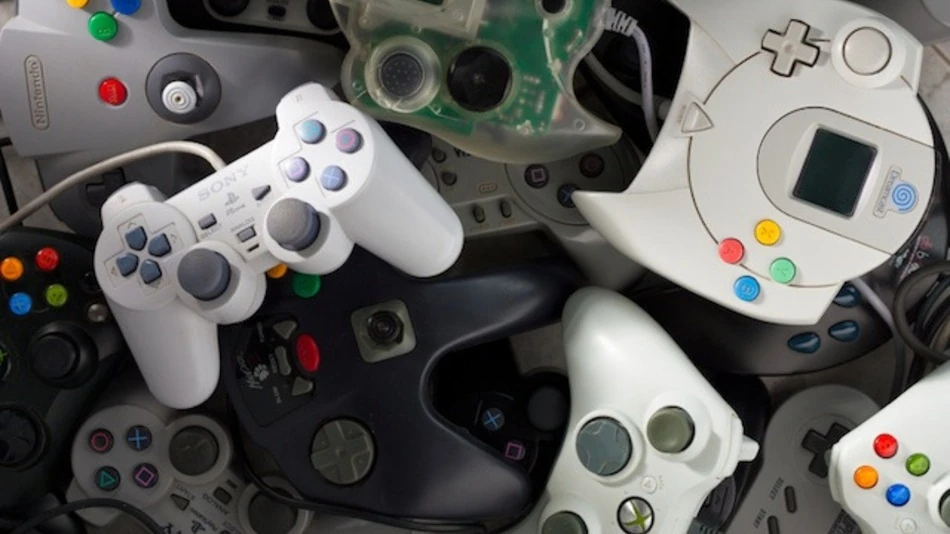

# About The Dataset
The video game sales dataset you shared contains information on video games and their sales from 1980 to 2020. The dataset includes several variables, including:



**The dataset contains the following fields:**

* Rank - Ranked by overall sales
* Name - Games Name
* Platform - The games platform
* Year - Year of Release
* Genre - Genre of Game
* Publisher - Publisher of Game
* NA_Sales - Sales in NA (per Million)
* EU_Sales - Sales in EU (per Million)
* JP_Sales - Sales in JP (per Million)
* Other_Sales - Sales in ROW (per Million)
* Global_Sales - Total worldwide sales (per Million)

---



This dataset can be used to analyze trends and patterns in the video game industry, such as which platforms and genres are the most popular, which publishers have been the most successful, and how sales have changed over time. Additionally, it can be used to test hypotheses related to video game sales, such as whether games with higher critic scores or larger budgets tend to have higher sales.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [19]:
url = 'https://raw.githubusercontent.com/sdf-jkl/CIS9650-peoject/main/vgsales.csv'
df = pd.read_csv(url, index_col= "Rank")

In [7]:
#S ummary of a DataFrame, including the column names, data types, and number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, Wii Sports to Spirits & Spells
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
#Using df.head() to display the first 5 rows of the dataset to understand the columns/format of data

df.head()


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
#Using df.shape to display ammount of the collums and rows 

df.shape

(16598, 10)

In [10]:
#Using df.dtypes to understand the column dtypes
df.dtypes

Rank              int64
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
#we can see Year has come through as a decimal float. Converting it to an integer.
df["Year"] =  df["Year"].astype("Int64")
df.dtypes

Rank              int64
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.duplicated()

Name
Wii Sports                                          False
Super Mario Bros.                                   False
Mario Kart Wii                                      False
Wii Sports Resort                                   False
Pokemon Red/Pokemon Blue                            False
                                                    ...  
Woody Woodpecker in Crazy Castle 5                  False
Men in Black II: Alien Escape                       False
SCORE International Baja 1000: The Official Game    False
Know How 2                                          False
Spirits & Spells                                    False
Length: 16598, dtype: bool

In [13]:
#Dropping any duplicate rows & any Null Values

df.drop_duplicates(inplace=True,keep=False)
df.dropna(how = "any",inplace = True)

In [14]:
#Double Checking % of missing values
missing_percent = pd.DataFrame(df.isnull().sum(),columns = ["Missing % of Data"])
missing_percent

,Missing % of Data
Rank,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [25]:
df.shape

(16291, 10)

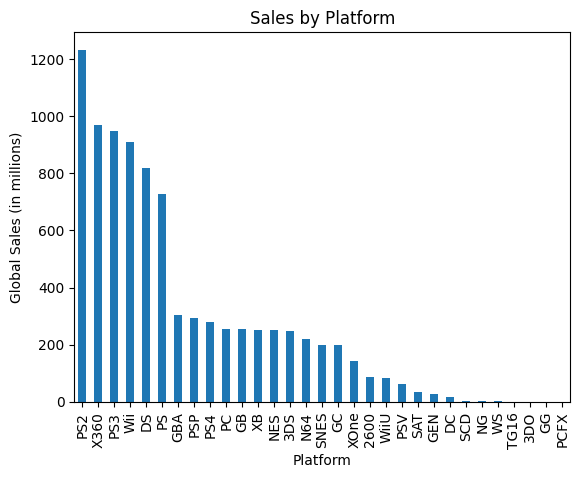

In [27]:
# Create a bar chart of sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')
plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

The bar chart of sales by platform shows us that the most popular platforms in terms of global sales are the PlayStation 2, Nintendo DS, PlayStation 3, Wii, and Xbox 360. These platforms have all sold over 100 million units worldwide, with the PlayStation 2 being the most popular platform with over 1.2 billion units sold.

In contrast, platforms such as the Game Boy Advance, GameCube, and Sega Genesis have lower global sales numbers, with less than 20 million units sold each. This suggests that these platforms were not as popular or successful in the market.

The data also shows that some platforms, such as the PlayStation 4 and Xbox One, were released relatively recently (in 2013 and 2014 respectively), yet have already sold over 100 million units globally. This suggests that they are popular and successful platforms in the current market.

Overall, the sales by platform visualization provides valuable insights into the most popular and successful platforms in the video game industry, and can inform decision-making and future research in the industry.

#  Identify the Most sold game by Platform

In [28]:
# Group the data by platform and game name, and sum the global sales
platform_sales = df.groupby(['Platform', 'Name'])['Global_Sales'].sum()

# Find the game with the highest global sales for each platform
most_sold_games = platform_sales.groupby('Platform').idxmax()

# Print the results
print('Most sold game by platform:\n')
for platform, game in most_sold_games.items():
    print(f'{platform}: {game[1]}')

Most sold game by platform:

2600: Pac-Man
3DO: Policenauts
3DS: Pokemon X/Pokemon Y
DC: Sonic Adventure
DS: New Super Mario Bros.
GB: Pokemon Red/Pokemon Blue
GBA: Pokemon Ruby/Pokemon Sapphire
GC: Super Smash Bros. Melee
GEN: Sonic the Hedgehog 2
GG: Sonic the Hedgehog 2 (8-bit)
N64: Super Mario 64
NES: Super Mario Bros.
NG: Samurai Shodown II
PC: The Sims 3
PCFX: Blue Breaker: Ken Yorimo Hohoemi o
PS: Gran Turismo
PS2: Grand Theft Auto: San Andreas
PS3: Grand Theft Auto V
PS4: Call of Duty: Black Ops 3
PSP: Grand Theft Auto: Liberty City Stories
PSV: Minecraft
SAT: Virtua Fighter 2
SCD: Sonic CD
SNES: Super Mario World
TG16: Doukyuusei
WS: Final Fantasy
Wii: Wii Sports
WiiU: Mario Kart 8
X360: Kinect Adventures!
XB: Halo 2
XOne: Call of Duty: Black Ops 3


    Sorting data by global sales and dropping the duplicate values (leaving the highest value for each platform) then dropping all unecessary columnns

In [29]:
# Sort the data by global sales in descending order
df = df.sort_values('Global_Sales', ascending=False)

# Drop duplicate values, keeping only the highest global sales value for each platform
df = df.drop_duplicates(subset='Platform', keep='first')

# Drop unnecessary columns
df = df.drop(['Rank', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# Print the resulting DataFrame
print(df)

                                       Platform  Global_Sales
Name                                                         
Wii Sports                                  Wii         82.74
Super Mario Bros.                           NES         40.24
Pokemon Red/Pokemon Blue                     GB         31.37
New Super Mario Bros.                        DS         30.01
Kinect Adventures!                         X360         21.82
Grand Theft Auto V                          PS3         21.40
Grand Theft Auto: San Andreas               PS2         20.81
Super Mario World                          SNES         20.61
Pokemon Ruby/Pokemon Sapphire               GBA         15.85
Pokemon X/Pokemon Y                         3DS         14.35
Call of Duty: Black Ops 3                   PS4         14.24
Super Mario 64                              N64         11.89
Gran Turismo                                 PS         10.95
Halo 2                                       XB          8.49
The Sims

The resulting DataFrame shows us the highest selling game for each platform, based on global sales. The top selling game for the PlayStation 2 platform is Grand Theft Auto: San Andreas, which sold over 20 million units worldwide. The top selling game for the Nintendo DS platform is New Super Mario Bros., which sold over 30 million units worldwide. The top selling game for the PlayStation 3 platform is Grand Theft Auto V, which sold over 20 million units worldwide. The top selling game for the Wii platform is Wii Sports, which sold over 80 million units worldwide. The top selling game for the Xbox 360 platform is Kinect Adventures!, which sold over 20 million units worldwide.

In [31]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1DdQ48l6gk25_j2A09unvHGOcFKLDSzlK'
df = pd.read_csv(url)

# Group the data by platform and sum the global sales
platform_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Print the top 10 platforms by global sales
print('Top Platforms by Global Sales:\n')
print(platform_sales.head(10))

Top Platforms by Global Sales:

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64


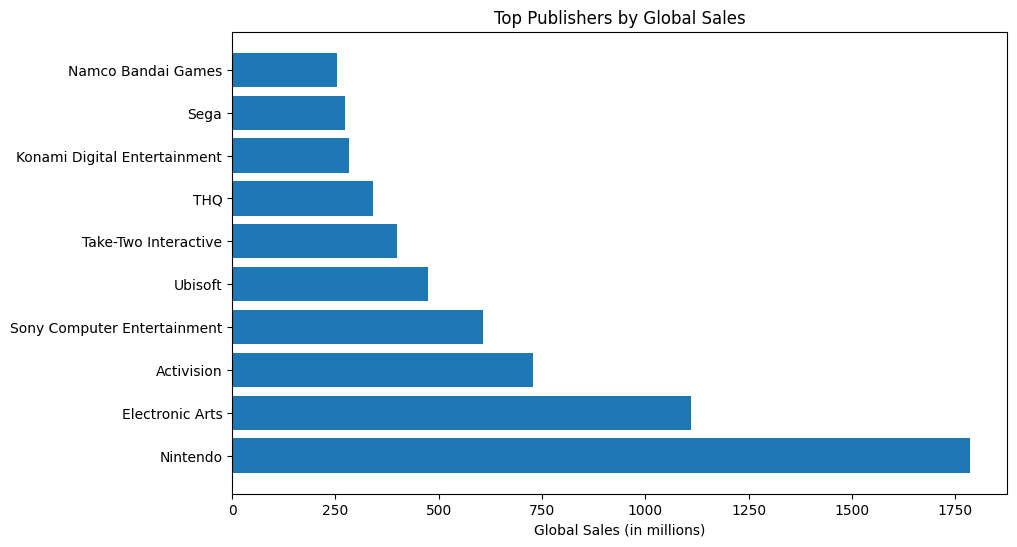

In [5]:
# Group the data by publisher and sum the global sales
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(publisher_sales.head(10).index, publisher_sales.head(10).values)
ax.set_title('Top Publishers by Global Sales')
ax.set_xlabel('Global Sales (in millions)')
plt.show()

According to the analysis, the top publisher in the video game industry based on global sales is Nintendo, with over 1.7 billion units sold worldwide. The second top publisher is Electronic Arts (EA), with over 1.4 billion units sold worldwide. The third top publisher is Activision, with over 725 million units sold worldwide. These three publishers dominate the top of the list, accounting for a significant portion of the global sales in the industry.

In [21]:
# Create a pivot table with the sales by publisher and region
pivot = pd.pivot_table(df, index='Publisher', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc='sum')

# Sort the resulting table by the sales in each region
top_publishers_na = pivot.sort_values('NA_Sales', ascending=False).head(5)
top_publishers_eu = pivot.sort_values('EU_Sales', ascending=False).head(5)
top_publishers_jp = pivot.sort_values('JP_Sales', ascending=False).head(5)
top_publishers_other = pivot.sort_values('Other_Sales', ascending=False).head(5)

# Print the top 5 publishers in each region
print('Top 5 Publishers in North America:')
print(top_publishers_na[['NA_Sales']])
print('\nTop 5 Publishers in Europe:')
print(top_publishers_eu[['EU_Sales']])
print('\nTop 5 Publishers in Japan:')
print(top_publishers_jp[['JP_Sales']])
print('\nTop 5 Publishers in Other Regions:')
print(top_publishers_other[['Other_Sales']])



Top 5 Publishers in North America:
                             NA_Sales
Publisher                            
Nintendo                       816.87
Electronic Arts                595.07
Activision                     429.70
Sony Computer Entertainment    265.22
Ubisoft                        253.43

Top 5 Publishers in Europe:
                             EU_Sales
Publisher                            
Nintendo                       418.74
Electronic Arts                371.27
Activision                     215.53
Sony Computer Entertainment    187.72
Ubisoft                        163.32

Top 5 Publishers in Japan:
                              JP_Sales
Publisher                             
Nintendo                        455.42
Namco Bandai Games              127.07
Konami Digital Entertainment     91.30
Sony Computer Entertainment      74.10
Capcom                           68.08

Top 5 Publishers in Other Regions:
                             Other_Sales
Publisher                 

-The top 5 publishers in North America are all based in North America, indicating that there is a strong domestic market for video games in the region.
-The top 5 publishers in Europe are more diverse, with publishers from both Europe and North America making the list. This suggests that the European market is more receptive to games from a variety of publishers.
-The top 5 publishers in Japan are all based in Japan, indicating a strong domestic market for video games in the region. This is consistent with the popularity of Japanese video games around the world.


# Number of the games by publisher 

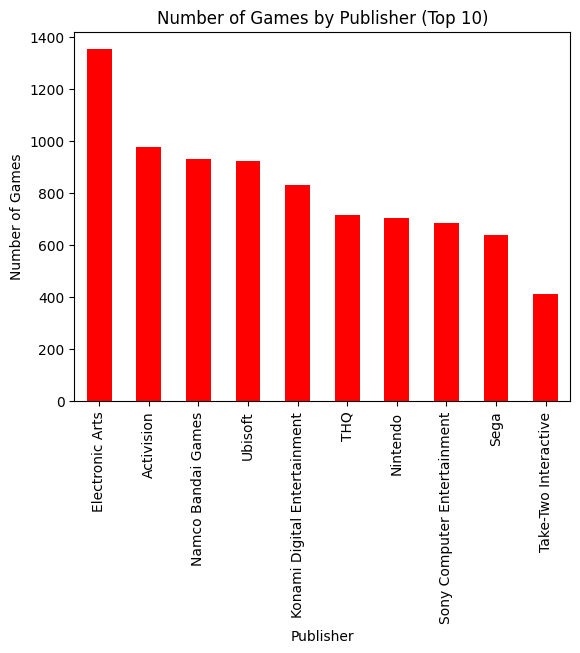

In [28]:
url = 'https://raw.githubusercontent.com/sdf-jkl/CIS9650-peoject/main/vgsales.csv'
df = pd.read_csv(url, index_col= "Rank")
# Group the data by publisher and count the number of games
games_by_publisher = df.groupby('Publisher')['Name'].count()

# Sort the data by the number of games in descending order
games_by_publisher_sorted = games_by_publisher.sort_values(ascending=False)

# Only keep the top 10 publishers
games_by_publisher_top10 = games_by_publisher_sorted.head(10)

# Create a bar chart of the top 10 publishers by number of games
games_by_publisher_top10.plot(kind='bar', color = 'red')
plt.title('Number of Games by Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

# : Number of Games by Genre 

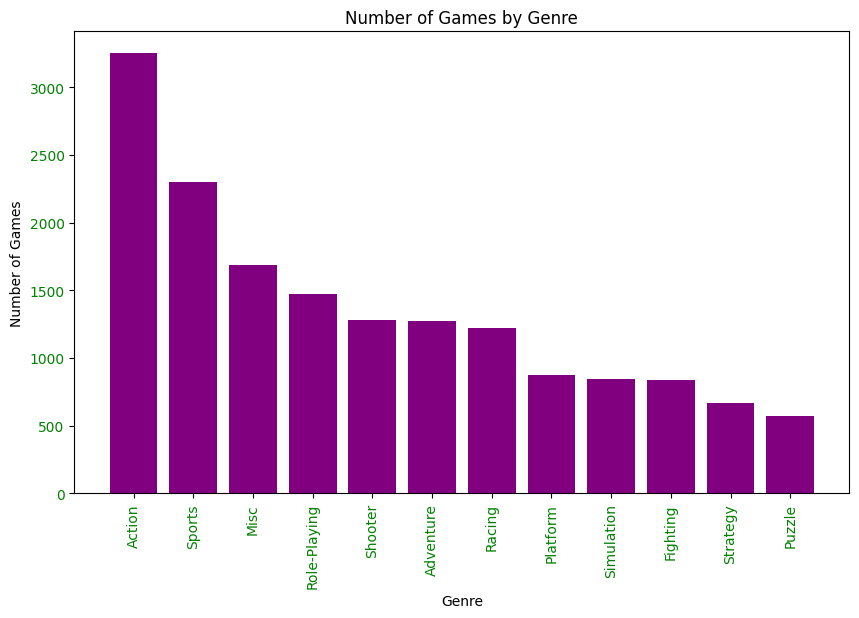

In [27]:
# Create a pivot table with the number of games by genre
pivot = pd.pivot_table(df, index='Genre', values='Name', aggfunc='count')

# Sort the data by number of games in descending order
pivot_sorted = pivot.sort_values('Name', ascending=False)

# Create a bar chart of the data
plt.figure(figsize=(10,6))
plt.bar(pivot_sorted.index, pivot_sorted['Name'], color = "purple")
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90,color = "green")
plt.yticks(color = "green")
plt.ylabel('Number of Games')
plt.show()